Amplitude 1 :1
freq 1 :100
Amplitude 2 :5
freq 2 :5
Sampling Frequency :300
N data :200
Input Signal :


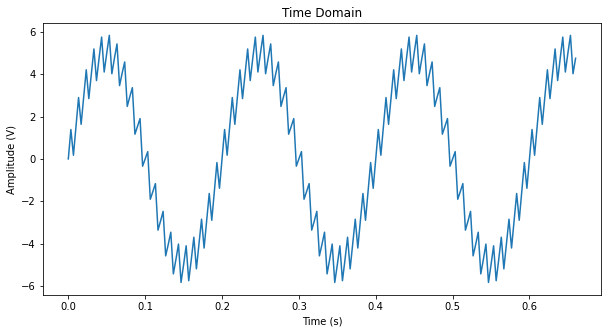

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#input signal
A1 = int(input('Amplitude 1 :'))
fo1 = int(input('freq 1 :'))
A2 = int(input('Amplitude 2 :'))
fo2 = int(input('freq 2 :'))
fs = int(input('Sampling Frequency :'))
N = int(input('N data :'))

#initial array
x = np.zeros(4000)

def signal(n):
    return A1*np.sin(2*fo1*np.pi*n/fs) + A2*np.sin(2*fo2*np.pi*n/fs)

for n in range(N):
    x[n] = signal(n)
    
#looping
n = np.arange(0,N-1,1,dtype=int)


#plot signal
print('Input Signal :')
plt.figure(figsize=((10,5)))
plt.plot(n/fs,x[n])
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (V)")
plt.title("Time Domain")
plt.show()

DFT :


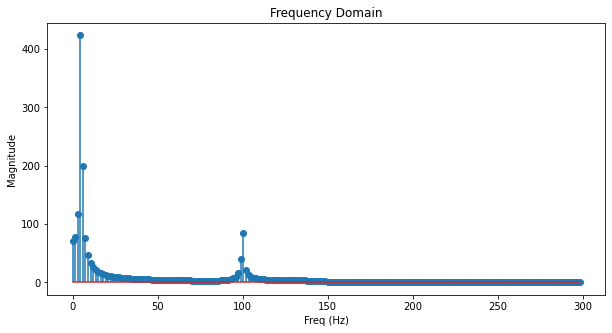

In [18]:
#initial array
X_real = np.zeros(4000)
X_imaj = np.zeros(4000)
MagDFT = np.zeros(4000) 

#DFT
for k in range(N):
    for n in range(N):
        X_real[k] += x[n]*np.cos(2*np.pi*k*n/N) #Xreal = Xreal + .......
        X_imaj[k] -= x[n]*np.sin(2*np.pi*k*n/N) #X_imaj = Ximaj - .....
    
for k in range(round(N/2)):
    MagDFT[k] = np.sqrt(np.square(X_real[k]) + np.square(X_imaj[k])) 

#looping
n = np.arange(0,N,1,dtype=int)
k = np.arange(0,N,1,dtype=int)     
    
#plotting sinyal DFT
print('DFT :')
plt.figure(figsize=((10,5)))
plt.stem(k*fs/N, MagDFT[k])
plt.xlabel("Freq (Hz)")
plt.ylabel("Magnitude")
plt.title("Frequency Domain")
plt.show()

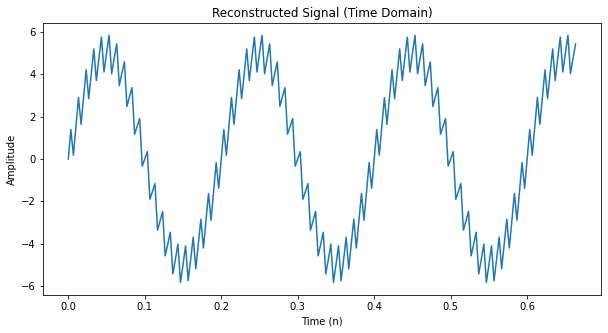

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Fungsi IDFT
def IDFT(XrealDFT, XimajDFT, mm):
    # Inisialisasi array untuk menyimpan hasil IDFT
    XrealIDFT = np.zeros(mm)
    XimajIDFT = np.zeros(mm)
    magIDFT = np.zeros(mm)
    
    # Proses IDFT
    for n in range(mm):
        j_real = 0
        j_imaj = 0
        for k in range(mm):
            j_real += np.cos(2 * np.pi * k * n / mm) * XrealDFT[k]  # Bagian real
            j_imaj += np.sin(2 * np.pi * k * n / mm) * (-XimajDFT[k])  # Bagian imajiner
        
        XrealIDFT[n] = j_real
        XimajIDFT[n] = j_imaj
    
    # Menghitung amplitudo dari sinyal yang direkonstruksi
    for n in range(mm):
        magIDFT[n] = (1 / mm) * (XrealIDFT[n] + XimajIDFT[n])  # Amplitudo sinyal IDFT
    
    return magIDFT

# Menghitung hasil IDFT
magIDFT = IDFT(X_real, X_imaj, N)

# Plot hasil IDFT
n = np.arange(0, N, 1)

plt.figure(figsize=((10, 5)))
plt.plot(n/fs, magIDFT)
plt.xlabel("Time (n)")
plt.ylabel("Amplitude")
plt.title("Reconstructed Signal (Time Domain)")
plt.show()
